## Photonic crystal 2D

In [9]:
%reload_ext autoreload
%autoreload

from Electromagnetics.PhotonicCrystals import *
from scipy import constants
import numpy as np
import math
from sympy import init_printing

#init_printing(use_latex='png')

scale = 1.0 #constants.micro
DX = [1.0*scale, 1.0*scale]
D_phi = math.pi/3.0
pctm = PC2D_EPS(mode='TM', Ns=[64, 64], vb=True, symm=False, mu_r=1.0, DX=DX, D_phi=D_phi)
#pctm.set_f_eps_rect(1.0, 10.0, 0.5*scale, 0.5*scale)
#pctm.set_f_eps_circ_gaussian(1.0, 10.0, 0.5*scale)
#pctm.set_f_eps_circ(2.0, 10.0, 0.5*scale)
#--pctm.set_f_eps_circ_Fermi(13.0, 1.0, 0.48*scale, beta=80.0)
#pctm.set_f_eps_rect_Fermi(8.9, 1.0, (1.0-0.165)*scale, (1.0-0.165)*scale, beta=100)

#pctm.set_f_eps_circ_honeycomb_supercell_Fermi(1.0, 4.0, 0.05*scale, beta=60.0, SC_scales=[3, 3])
#pctm.set_f_eps_circ_honeycomb_defect_supercell_Fermi(1.0, 2.0, 2.1, 0.02*scale, 0.02*scale, beta=60.0, SC_scales=[9, 9])


SC_scales = [6, 6]
mat_defect = np.array([[1, 0, 0, 1, 0, 0],
                       [0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0],
                       [1, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0]])
pctm.set_f_eps_circ_defect_supercell_Fermi(1.0, 2.0, 4.0, 0.02*scale, 0.02*scale, beta=60.0, SC_scales=SC_scales,
                                                     mat_defect=mat_defect)


pctm.setupEquations(regenerateEQs=False)



v_dir_0:  (1.0, 0.0, 0.0)
v_dir_1:  (0.5000000000000001, 0.8660254037844386, 0.0)
v_rec_0:  (6.283185307179586, -3.6275987284684366, -0.0)
v_rec_1:  (0.0, 7.255197456936872, 0.0)


harmonic: 


In [10]:
#pctm.Ns=[32, 32]
pctm.useFFT = True
pctm.pc2d.calculateDenseMatrices = False
pctm.initializeEqsk()

#pctm.set_eps_r_vec_for_test()

f_x:
 [[ 0.56544302  0.59698658  0.63887527 ...,  0.69031239  0.63887527
   0.59698658]
 [ 0.59698658  0.62663492  0.67116239 ...,  0.67116239  0.62663492
   0.59698658]
 [ 0.63887527  0.67116239  0.71653339 ...,  0.67116239  0.63887527
   0.62663492]
 ..., 
 [ 0.69031239  0.67116239  0.67116239 ...,  0.81620262  0.7687257
   0.72470621]
 [ 0.63887527  0.62663492  0.63887527 ...,  0.7687257   0.71653339
   0.67116239]
 [ 0.59698658  0.59698658  0.62663492 ...,  0.72470621  0.67116239
   0.62663492]]
0.30251928832 0.988976574742
x_mesh: [array([[-0.5      , -0.4921875, -0.484375 , ...,  0.4765625,  0.484375 ,
         0.4921875],
       [-0.5      , -0.4921875, -0.484375 , ...,  0.4765625,  0.484375 ,
         0.4921875],
       [-0.5      , -0.4921875, -0.484375 , ...,  0.4765625,  0.484375 ,
         0.4921875],
       ..., 
       [-0.5      , -0.4921875, -0.484375 , ...,  0.4765625,  0.484375 ,
         0.4921875],
       [-0.5      , -0.4921875, -0.484375 , ...,  0.4765625,  0.4843

In [11]:
for i in range(2):
    print(pctm.vecRecip_vals[i])

K_G, K_X, K_M, K_K = [None]*4
    
#K_G, K_X, K_M = pctm.getSymmetryPointsSquareLattice()
K_G, K_M, K_K = pctm.getSymmetryPointsHexagonalLattice()

print('K_G:', K_G)
print('K_X:', K_X)
print('K_M:', K_M)
print('K_K:', K_K)

K_ = K_K*0.99

k_mag, k_ang = pctm.getMagAngleK2D(K_)
print("k_mag: {}   k_ang: {}".format(k_mag, k_ang))

pctm.setEqskinit(k_mag, k_ang)

(6.283185307179586, -3.6275987284684366, -0.0)
(0.0, 7.255197456936872, 0.0)
K_G: (0.0, 0.0)
K_X: None
K_M: (0.0, 3.627598728468436)
K_K: (2.094395102393196, 3.627598728468436)
k_mag: 4.1469023027385274   k_ang: 1.0471975511965976


Populating the interactive namespace from numpy and matplotlib


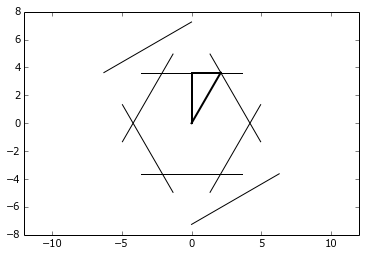

In [12]:
%pylab inline 
    
endpoints = pctm.getBZLines()
for ln in endpoints:
    v0, v1 = ln
    plot([v0.x, v1.x], [v0.y, v1.y], color='k', linestyle='-', linewidth=1)

axis('equal')


if K_K!=None:
    plot([K_G.x, K_M.x], [K_G.y, K_M.y], color='k', linestyle='-', linewidth=2)
    plot([K_M.x, K_K.x], [K_M.y, K_K.y], color='k', linestyle='-', linewidth=2)
    plot([K_K.x, K_G.x], [K_K.y, K_G.y], color='k', linestyle='-', linewidth=2)



In [5]:
from Electromagnetics.Misc import tic, toc

#pctm.Ns=[32, 32]
#3.66886671e+06 +2.56289557e-15j
#eig_vec_0 = np.ones(pctm.pc2d.n_total)
#omega_eigs = pctm.solveEigenvalues(n_eigs=3, eig_0=None, eig_vec_0=eig_vec_0, which='SM', tol=1.0e-3, ncv=None, maxiter=None)

a_tic = tic()

eig_vec_0 = None
n_eigs = 3
omega_eigs = pctm.solveEigenvalues(n_eigs=n_eigs, eig_0=-10.0, eig_vec_0=eig_vec_0, which='SM', tol=1.0e-3, 
                                   ncv=n_eigs*3+1, maxiter=None, shift_manually=True)

print(np.sqrt(omega_eigs[0])/(2.0*math.pi))
print(pctm.n_mat_vec_fft)
print(pctm.n_mat_vec_dir)

print(toc(a_tic))

KeyboardInterrupt: 

time_start:  7.97527


Populating the interactive namespace from numpy and matplotlib
1.01114629561
[[ 1.67555791  1.90256239  2.1396085   2.34585853  2.46985711  2.46985711]
 [ 1.90256239  2.1868251   2.46985711  2.69575224  2.78747654  2.69575224]
 [ 2.1396085   2.46985711  2.78747654  3.02523855  3.02523855  2.78747654]
 [ 2.34585853  2.69575224  3.02523855  3.30557435  3.02523855  2.69575224]
 [ 2.46985711  2.78747654  3.02523855  3.02523855  2.78747654  2.46985711]
 [ 2.46985711  2.69575224  2.78747654  2.69575224  2.46985711  2.1868251 ]]


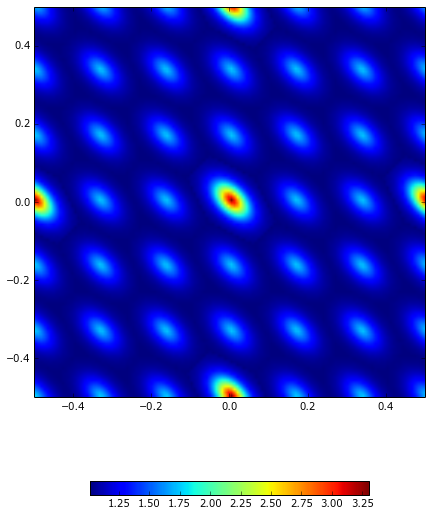

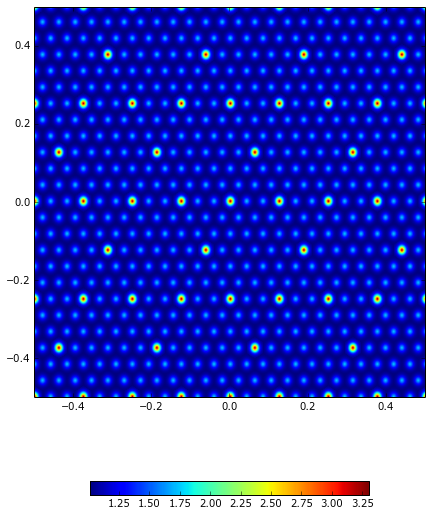

In [13]:
%pylab inline 

N2 = pctm.eps_r_inv_vec.shape[0]

figsize(10, 10)

eps_r_inv_vec = pctm.eps_r_inv_vec
eps_r_inv_vec = np.abs(eps_r_inv_vec)
Z = eps_r_inv_vec
Z = np.abs(1.0/pctm.pc2d.getInverseFourierCoeffs(pctm.eps_r_inv_vec))
print(np.min(Z))
print(Z[N2/2-3:N2/2+3, N2/2-3:N2/2+3])

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.jet,
                origin='lower', extent=[-DX[0]/2, DX[0]/2, -DX[1]/2, DX[1]/2],
                vmax=abs(Z).max(), vmin=abs(Z).min())
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.5)
show()


## real to tilted space
n_cells = 4
x = np.linspace(-DX[0]/2.0, DX[0]/2.0, N2*n_cells, endpoint=False)*n_cells
y = np.linspace(-DX[1]/2.0, DX[1]/2.0, N2*n_cells, endpoint=False)*n_cells
X, Y = np.meshgrid(x, y)

X = X - Y*math.cos(D_phi)

eps_vec = 1.0/pctm.f_eps_inv( [X, Y] )
eps_vec = np.abs(eps_vec)
Z = eps_vec

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.jet,
                origin='lower', extent=[-DX[0]/2, DX[0]/2, -DX[1]/2, DX[1]/2],
                vmax=abs(Z).max(), vmin=abs(Z).min())
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.5)
show()



Populating the interactive namespace from numpy and matplotlib
(4096,)
x_vec.shape: (4096,)
(64, 64)


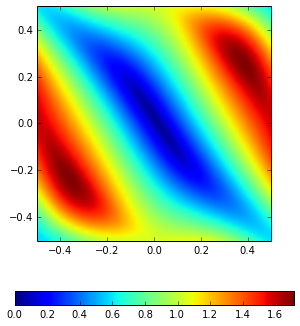

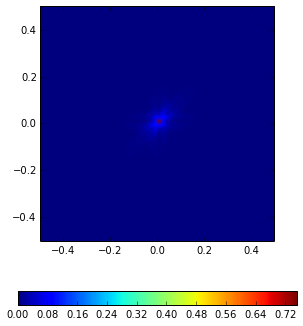

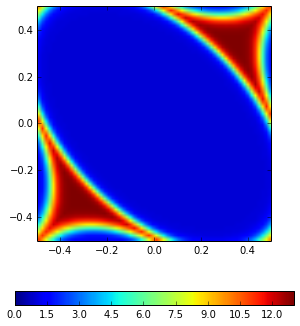

12.9899425871
1.0


In [12]:
%pylab inline 

omega_eigs_vecs = omega_eigs[1].T
G_z_F = omega_eigs_vecs[1]
print(G_z_F.shape)
G_z = pctm.getVarsFields(G_z_F)

print(G_z.shape)

x = np.linspace(-DX[0]/2, DX[0]/2, G_z.shape[0], endpoint=False)
y = np.linspace(-DX[1]/2, DX[1]/2, G_z.shape[1], endpoint=False)
X, Y = np.meshgrid(x, y)
Z = np.abs(G_z)

figsize(10, 6)
im = plt.imshow(Z, interpolation='bilinear', cmap=cm.jet,
                origin='lower', extent=[-DX[0]/2, DX[0]/2, -DX[1]/2, DX[1]/2],
                vmax=abs(Z).max(), vmin=0.0)

CBI = plt.colorbar(im, orientation='horizontal', shrink=0.5)
show()


#eps_vec = 1/pctm.pc2d.getInverseFourierCoeffs(pctm.eps_r_inv_vec)
eps_r_inv_vec = pctm.eps_r_inv_vec
eps_r_inv_vec = np.abs(eps_r_inv_vec)
Z = eps_r_inv_vec

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.jet,
                origin='lower', extent=[-DX[0]/2, DX[0]/2, -DX[1]/2, DX[1]/2],
                vmax=abs(Z).max(), vmin=abs(Z).min())
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.5)
show()

eps_vec = 1.0/pctm.f_eps_inv( [X, Y] )
eps_vec = np.abs(eps_vec)
Z = eps_vec

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.jet,
                origin='lower', extent=[-DX[0]/2, DX[0]/2, -DX[1]/2, DX[1]/2],
                vmax=abs(Z).max(), vmin=0.0)
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.5)
show()


print(np.max(eps_vec))
print(np.min(eps_vec))

In [25]:
import pickle
import os

lattice_type = 'hexagonal'

if lattice_type == 'square':
    [Gamma, X, M] = pctm.getSymmetryPointsSquareLattice()
    
    print('Gamma: ', Gamma)
    print('X: ', X)
    print('M: ', M)
    
    [omega_eigs, omega_eigs_vecs] = pctm.sweepK(Gamma, X, saveToFile='./other/datafiles/photonic_crystals/pc2ddata')
elif lattice_type == 'hexagonal':
    [Gamma, M, K] = pctm.getSymmetryPointsHexagonalLattice()
    
    print('Gamma: ', Gamma)
    print('M: ', M)
    print('K: ', K)
    
    def getLastEigVecs(omega_eigs, omega_eigs_vecs):
        n_bands = len(omega_eigs_vecs)
        n_pts = len(omega_eigs_vecs[0])
        eigs_vec_last = [None]*n_bands
        for i in range(n_bands):
            for j in range(n_pts-1, 0, -1):
                if omega_eigs[i][j] != None:
                    eigs_vec_last[i] = omega_eigs_vecs[i][j]
                    continue
            assert eigs_vec_last[i]!=None
        return eigs_vec_last
    
    n_pts=10
    n_bands=3
    
    L_GM = (M - Gamma).norm()
    L_MK = (K - M).norm()
    
    
    file_name = './other/datafiles/photonic_crystals/pc2ddata'
    [k_2D_pts, omega_eigs, omega_eigs_vecs] = pctm.sweepK(Gamma, M, n_pts=n_pts, n_bands=n_bands, saveToFile=file_name+'_GM')
    k_2D_pts_GM, omega_eigs_GM, omega_eigs_vecs_GM = k_2D_pts, omega_eigs, omega_eigs_vecs

    eigs_vecs_init = getLastEigVecs(omega_eigs, omega_eigs_vecs)
    [k_2D_pts, omega_eigs, omega_eigs_vecs] = pctm.sweepK(M, K, n_pts=n_pts, n_bands=n_bands, saveToFile=file_name+'_MK', eigs_vecs_init=eigs_vecs_init)
    k_2D_pts_MK, omega_eigs_MK, omega_eigs_vecs_MK = k_2D_pts, omega_eigs, omega_eigs_vecs
    
    eigs_vecs_init = getLastEigVecs(omega_eigs, omega_eigs_vecs)
    [k_2D_pts, omega_eigs, omega_eigs_vecs] = pctm.sweepK(K, Gamma, n_pts=n_pts, n_bands=n_bands, saveToFile=file_name+'_KG', eigs_vecs_init=eigs_vecs_init)
    k_2D_pts_KG, omega_eigs_KG, omega_eigs_vecs_KG = k_2D_pts, omega_eigs, omega_eigs_vecs
    
    f_name = file_name + '_fin'
    f_dir = os.path.dirname(f_name)
    if not os.path.exists(f_dir):
        os.makedirs(f_dir)
    f = open(f_name, 'wb')
    res_GM = [k_2D_pts_GM, omega_eigs_GM, omega_eigs_vecs_GM]
    pickle.dump(res_GM, f)
    res_MK = [k_2D_pts_MK, omega_eigs_MK, omega_eigs_vecs_MK]
    pickle.dump(res_MK, f)
    res_KG = [k_2D_pts_KG, omega_eigs_KG, omega_eigs_vecs_KG]
    pickle.dump(res_KG, f)
    symm_points = [Gamma, M, K]
    pickle.dump(symm_points, f)
    f.close()

    

Gamma:  (0.0, 0.0)
M:  (0.0, 3.627598728468436)
K:  (2.094395102393196, 3.627598728468436)
i: 0 k_i_2D:  (0.0, 0.0) k_i: 0.0 theta_i: 0.0


omega_eigs_i:  [  3.83283522e-07 -6.36201038e-09j   7.64742992e-01 +1.10318637e-09j
   7.56689434e-01 -4.11405035e-07j]
number of mat vec products:  11363
inds_omega_sorted:  [0, 2, 1]
[(3.8328352227573982e-07-6.3620103830457076e-09j), None, None, None, None, None, None, None, None, None] 

[(0.75668943386499354-4.1140503486426582e-07j), None, None, None, None, None, None, None, None, None] 

[(0.76474299153889025+1.1031863677511339e-09j), None, None, None, None, None, None, None, None, None] 

i: 1 k_i_2D:  (0.0, 0.36275987284684363) k_i: 0.36275987284684363 theta_i: 1.5707963267948966


omega_eigs_i:  [ 0.03960534 -5.12455730e-14j  0.74780936 -9.85147709e-10j
  0.75357521 -5.43252026e-09j]
number of mat vec products:  11684
inds_omega_sorted:  [0, 1, 2]
[(3.8328352227573982e-07-6.3620103830457076e-09j), (0.039605341233047313-5.1245573005719063e-14j), None, None, None, None, None, None, None, None] 

[(0.75668943386499354-4.1140503486426582e-07j), (0.74780935697810391-9.8514770881689803e-10j), None, None, None, None, None, None, None, None] 

[(0.76474299153889025+1.1031863677511339e-09j), (0.75357521043036468-5.4325202592475524e-09j), None, None, None, None, None, None, None, None] 

i: 2 k_i_2D:  (0.0, 0.7255197456936873) k_i: 0.7255197456936873 theta_i: 1.5707963267948966


omega_eigs_i:  [ 0.07906419 +3.13649742e-14j  0.72522863 -4.15746432e-10j
  0.74549839 +2.68935235e-10j]
number of mat vec products:  10753
inds_omega_sorted:  [0, 1, 2]
[(3.8328352227573982e-07-6.3620103830457076e-09j), (0.039605341233047313-5.1245573005719063e-14j), (0.0790641865140424+3.1364974233993808e-14j), None, None, None, None, None, None, None] 

[(0.75668943386499354-4.1140503486426582e-07j), (0.74780935697810391-9.8514770881689803e-10j), (0.72522862769517438-4.1574643200359244e-10j), None, None, None, None, None, None, None] 

[(0.76474299153889025+1.1031863677511339e-09j), (0.75357521043036468-5.4325202592475524e-09j), (0.74549839207940505+2.6893523533601098e-10j), None, None, None, None, None, None, None] 

i: 3 k_i_2D:  (0.0, 1.0882796185405308) k_i: 1.0882796185405308 theta_i: 1.5707963267948966


omega_eigs_i:  [ 0.11820656 -5.74762825e-15j  0.69631319 +4.19436398e-10j
  0.73488953 -3.67920399e-09j]
number of mat vec products:  7873
inds_omega_sorted:  [0, 1, 2]
[(3.8328352227573982e-07-6.3620103830457076e-09j), (0.039605341233047313-5.1245573005719063e-14j), (0.0790641865140424+3.1364974233993808e-14j), (0.11820656363630569-5.7476282540462674e-15j), None, None, None, None, None, None] 

[(0.75668943386499354-4.1140503486426582e-07j), (0.74780935697810391-9.8514770881689803e-10j), (0.72522862769517438-4.1574643200359244e-10j), (0.69631318957941568+4.194363981404517e-10j), None, None, None, None, None, None] 

[(0.76474299153889025+1.1031863677511339e-09j), (0.75357521043036468-5.4325202592475524e-09j), (0.74549839207940505+2.6893523533601098e-10j), (0.7348895293292852-3.679203992784601e-09j), None, None, None, None, None, None] 

i: 4 k_i_2D:  (0.0, 1.4510394913873745) k_i: 1.4510394913873745 theta_i: 1.5707963267948966


omega_eigs_i:  [ 0.15680848 +4.56683893e-14j  0.66468370 -6.23498368e-11j
  0.72366741 +2.79420321e-09j]
number of mat vec products:  4572
inds_omega_sorted:  [0, 1, 2]
[(3.8328352227573982e-07-6.3620103830457076e-09j), (0.039605341233047313-5.1245573005719063e-14j), (0.0790641865140424+3.1364974233993808e-14j), (0.11820656363630569-5.7476282540462674e-15j), (0.15680848295609387+4.5668389322603149e-14j), None, None, None, None, None] 

[(0.75668943386499354-4.1140503486426582e-07j), (0.74780935697810391-9.8514770881689803e-10j), (0.72522862769517438-4.1574643200359244e-10j), (0.69631318957941568+4.194363981404517e-10j), (0.66468369838251307-6.2349836833009152e-11j), None, None, None, None, None] 

[(0.76474299153889025+1.1031863677511339e-09j), (0.75357521043036468-5.4325202592475524e-09j), (0.74549839207940505+2.6893523533601098e-10j), (0.7348895293292852-3.679203992784601e-09j), (0.72366741038114135+2.7942032060885964e-09j), None, None, None, None, None] 

i: 5 k_i_2D:  (0.0, 1.81379

omega_eigs_i:  [ 0.19453769 -2.37041394e-15j  0.63200739 +5.48792838e-12j
  0.71301569 -4.43701502e-10j]
number of mat vec products:  4261
inds_omega_sorted:  [0, 1, 2]
[(3.8328352227573982e-07-6.3620103830457076e-09j), (0.039605341233047313-5.1245573005719063e-14j), (0.0790641865140424+3.1364974233993808e-14j), (0.11820656363630569-5.7476282540462674e-15j), (0.15680848295609387+4.5668389322603149e-14j), (0.1945376917909715-2.3704139414762012e-15j), None, None, None, None] 

[(0.75668943386499354-4.1140503486426582e-07j), (0.74780935697810391-9.8514770881689803e-10j), (0.72522862769517438-4.1574643200359244e-10j), (0.69631318957941568+4.194363981404517e-10j), (0.66468369838251307-6.2349836833009152e-11j), (0.63200738701908032+5.4879283825766173e-12j), None, None, None, None] 

[(0.76474299153889025+1.1031863677511339e-09j), (0.75357521043036468-5.4325202592475524e-09j), (0.74549839207940505+2.6893523533601098e-10j), (0.7348895293292852-3.679203992784601e-09j), (0.72366741038114135+2.79

omega_eigs_i:  [ 0.23084799 -1.65256204e-14j  0.59942393 +9.78633523e-12j
  0.70364480 +6.77596210e-10j]
number of mat vec products:  3825
inds_omega_sorted:  [0, 1, 2]
[(3.8328352227573982e-07-6.3620103830457076e-09j), (0.039605341233047313-5.1245573005719063e-14j), (0.0790641865140424+3.1364974233993808e-14j), (0.11820656363630569-5.7476282540462674e-15j), (0.15680848295609387+4.5668389322603149e-14j), (0.1945376917909715-2.3704139414762012e-15j), (0.23084798638194937-1.6525620418062216e-14j), None, None, None] 

[(0.75668943386499354-4.1140503486426582e-07j), (0.74780935697810391-9.8514770881689803e-10j), (0.72522862769517438-4.1574643200359244e-10j), (0.69631318957941568+4.194363981404517e-10j), (0.66468369838251307-6.2349836833009152e-11j), (0.63200738701908032+5.4879283825766173e-12j), (0.59942392714788306+9.7863352289679508e-12j), None, None, None] 

[(0.76474299153889025+1.1031863677511339e-09j), (0.75357521043036468-5.4325202592475524e-09j), (0.74549839207940505+2.689352353360

omega_eigs_i:  [ 0.26475566 +8.66560836e-15j  0.56821688 +1.70979023e-11j
  0.69599679 +1.53540016e-09j]
number of mat vec products:  3049
inds_omega_sorted:  [0, 1, 2]
[(3.8328352227573982e-07-6.3620103830457076e-09j), (0.039605341233047313-5.1245573005719063e-14j), (0.0790641865140424+3.1364974233993808e-14j), (0.11820656363630569-5.7476282540462674e-15j), (0.15680848295609387+4.5668389322603149e-14j), (0.1945376917909715-2.3704139414762012e-15j), (0.23084798638194937-1.6525620418062216e-14j), (0.26475565554405395+8.6656083587484954e-15j), None, None] 

[(0.75668943386499354-4.1140503486426582e-07j), (0.74780935697810391-9.8514770881689803e-10j), (0.72522862769517438-4.1574643200359244e-10j), (0.69631318957941568+4.194363981404517e-10j), (0.66468369838251307-6.2349836833009152e-11j), (0.63200738701908032+5.4879283825766173e-12j), (0.59942392714788306+9.7863352289679508e-12j), (0.56821688210650856+1.7097902275604433e-11j), None, None] 

[(0.76474299153889025+1.1031863677511339e-09j), 

omega_eigs_i:  [ 0.29436307 -3.72502436e-14j  0.54044902 -8.65712828e-11j
  0.69035662 -1.06532974e-09j]
number of mat vec products:  3473
inds_omega_sorted:  [0, 1, 2]
[(3.8328352227573982e-07-6.3620103830457076e-09j), (0.039605341233047313-5.1245573005719063e-14j), (0.0790641865140424+3.1364974233993808e-14j), (0.11820656363630569-5.7476282540462674e-15j), (0.15680848295609387+4.5668389322603149e-14j), (0.1945376917909715-2.3704139414762012e-15j), (0.23084798638194937-1.6525620418062216e-14j), (0.26475565554405395+8.6656083587484954e-15j), (0.29436307354395558-3.7250243559813702e-14j), None] 

[(0.75668943386499354-4.1140503486426582e-07j), (0.74780935697810391-9.8514770881689803e-10j), (0.72522862769517438-4.1574643200359244e-10j), (0.69631318957941568+4.194363981404517e-10j), (0.66468369838251307-6.2349836833009152e-11j), (0.63200738701908032+5.4879283825766173e-12j), (0.59942392714788306+9.7863352289679508e-12j), (0.56821688210650856+1.7097902275604433e-11j), (0.54044902092572999-

omega_eigs_i:  [ 0.31603807 -3.66787255e-13j  0.51984581 -4.56773048e-12j
  0.68690507 -2.74035956e-09j]
number of mat vec products:  4052
inds_omega_sorted:  [0, 1, 2]
[(3.8328352227573982e-07-6.3620103830457076e-09j), (0.039605341233047313-5.1245573005719063e-14j), (0.0790641865140424+3.1364974233993808e-14j), (0.11820656363630569-5.7476282540462674e-15j), (0.15680848295609387+4.5668389322603149e-14j), (0.1945376917909715-2.3704139414762012e-15j), (0.23084798638194937-1.6525620418062216e-14j), (0.26475565554405395+8.6656083587484954e-15j), (0.29436307354395558-3.7250243559813702e-14j), (0.31603806507233467-3.6678725512677963e-13j)] 

[(0.75668943386499354-4.1140503486426582e-07j), (0.74780935697810391-9.8514770881689803e-10j), (0.72522862769517438-4.1574643200359244e-10j), (0.69631318957941568+4.194363981404517e-10j), (0.66468369838251307-6.2349836833009152e-11j), (0.63200738701908032+5.4879283825766173e-12j), (0.59942392714788306+9.7863352289679508e-12j), (0.56821688210650856+1.7097

omega_eigs_i:  [ 0.32433567 -1.00936053e-13j  0.51190062 -1.56189130e-11j
  0.68574368 -8.40779204e-09j]
number of mat vec products:  3380
inds_omega_sorted:  [0, 1, 2]
[(0.32433567416492576-1.0093605339983687e-13j), None, None, None, None, None, None, None, None, None] 

[(0.51190062101614087-1.5618912961516821e-11j), None, None, None, None, None, None, None, None, None] 

[(0.68574367587656804-8.4077920429633456e-09j), None, None, None, None, None, None, None, None, None] 

i: 1 k_i_2D:  (0.20943951023931962, 3.627598728468436) k_i: 3.6336396963974154 theta_i: 1.5131253219104708


omega_eigs_i:  [ 0.32493261 -1.07339569e-13j  0.51234394 +4.69817344e-12j
  0.68069289 +1.59735730e-09j]
number of mat vec products:  3772
inds_omega_sorted:  [0, 1, 2]
[(0.32433567416492576-1.0093605339983687e-13j), (0.32493261424203751-1.0733956906289858e-13j), None, None, None, None, None, None, None, None] 

[(0.51190062101614087-1.5618912961516821e-11j), (0.5123439432086685+4.6981734411190484e-12j), None, None, None, None, None, None, None, None] 

[(0.68574367587656804-8.4077920429633456e-09j), (0.6806928883577682+1.597357299731647e-09j), None, None, None, None, None, None, None, None] 

i: 2 k_i_2D:  (0.41887902047863923, 3.627598728468436) k_i: 3.651702639671385 theta_i: 1.45583540629419


omega_eigs_i:  [ 0.32669537 -1.23543975e-14j  0.51367118 +3.44356127e-13j
  0.66873400 +5.45092216e-09j]
number of mat vec products:  3695
inds_omega_sorted:  [0, 1, 2]
[(0.32433567416492576-1.0093605339983687e-13j), (0.32493261424203751-1.0733956906289858e-13j), (0.32669536597118631-1.2354397520413587e-14j), None, None, None, None, None, None, None] 

[(0.51190062101614087-1.5618912961516821e-11j), (0.5123439432086685+4.6981734411190484e-12j), (0.51367118219996344+3.4435612712314846e-13j), None, None, None, None, None, None, None] 

[(0.68574367587656804-8.4077920429633456e-09j), (0.6806928883577682+1.597357299731647e-09j), (0.66873399740544148+5.4509221640516656e-09j), None, None, None, None, None, None, None] 

i: 3 k_i_2D:  (0.6283185307179588, 3.627598728468436) k_i: 3.6816106136892572 theta_i: 1.3992927727924833


omega_eigs_i:  [ 0.32953626 +1.55661189e-12j  0.51587427 +5.47845541e-12j
  0.65382446 -2.99742832e-09j]
number of mat vec products:  4367
inds_omega_sorted:  [0, 1, 2]
[(0.32433567416492576-1.0093605339983687e-13j), (0.32493261424203751-1.0733956906289858e-13j), (0.32669536597118631-1.2354397520413587e-14j), (0.32953625876387205+1.556611886524821e-12j), None, None, None, None, None, None] 

[(0.51190062101614087-1.5618912961516821e-11j), (0.5123439432086685+4.6981734411190484e-12j), (0.51367118219996344+3.4435612712314846e-13j), (0.51587427368930439+5.4784554101248961e-12j), None, None, None, None, None, None] 

[(0.68574367587656804-8.4077920429633456e-09j), (0.6806928883577682+1.597357299731647e-09j), (0.66873399740544148+5.4509221640516656e-09j), (0.65382445594607763-2.9974283170668263e-09j), None, None, None, None, None, None] 

i: 4 k_i_2D:  (0.8377580409572785, 3.627598728468436) k_i: 3.7230781713488628 theta_i: 1.3438352477532258


omega_eigs_i:  [ 0.33330525 +1.23736130e-12j  0.51893999 +9.40874171e-10j
  0.63778768 -1.02951209e-08j]
number of mat vec products:  3376
inds_omega_sorted:  [0, 1, 2]
[(0.32433567416492576-1.0093605339983687e-13j), (0.32493261424203751-1.0733956906289858e-13j), (0.32669536597118631-1.2354397520413587e-14j), (0.32953625876387205+1.556611886524821e-12j), (0.33330525333574196+1.2373612973316614e-12j), None, None, None, None, None] 

[(0.51190062101614087-1.5618912961516821e-11j), (0.5123439432086685+4.6981734411190484e-12j), (0.51367118219996344+3.4435612712314846e-13j), (0.51587427368930439+5.4784554101248961e-12j), (0.51893998906295602+9.4087417078250836e-10j), None, None, None, None, None] 

[(0.68574367587656804-8.4077920429633456e-09j), (0.6806928883577682+1.597357299731647e-09j), (0.66873399740544148+5.4509221640516656e-09j), (0.65382445594607763-2.9974283170668263e-09j), (0.63778768097600502-1.0295120927243256e-08j), None, None, None, None, None] 

i: 5 k_i_2D:  (1.04719755119659

omega_eigs_i:  [ 0.33778267 -1.03287123e-12j  0.52285021 -3.01282289e-11j
  0.62146388 -3.94109261e-09j]
number of mat vec products:  3069
inds_omega_sorted:  [0, 1, 2]
[(0.32433567416492576-1.0093605339983687e-13j), (0.32493261424203751-1.0733956906289858e-13j), (0.32669536597118631-1.2354397520413587e-14j), (0.32953625876387205+1.556611886524821e-12j), (0.33330525333574196+1.2373612973316614e-12j), (0.33778267253325783-1.0328712279305469e-12j), None, None, None, None] 

[(0.51190062101614087-1.5618912961516821e-11j), (0.5123439432086685+4.6981734411190484e-12j), (0.51367118219996344+3.4435612712314846e-13j), (0.51587427368930439+5.4784554101248961e-12j), (0.51893998906295602+9.4087417078250836e-10j), (0.52285021160987222-3.0128228869104868e-11j), None, None, None, None] 

[(0.68574367587656804-8.4077920429633456e-09j), (0.6806928883577682+1.597357299731647e-09j), (0.66873399740544148+5.4509221640516656e-09j), (0.65382445594607763-2.9974283170668263e-09j), (0.63778768097600502-1.02951

omega_eigs_i:  [ 0.34266667 +1.68939492e-11j  0.52758237 -3.23667149e-10j
  0.60538993 -1.23003648e-08j]
number of mat vec products:  3650
inds_omega_sorted:  [0, 1, 2]
[(0.32433567416492576-1.0093605339983687e-13j), (0.32493261424203751-1.0733956906289858e-13j), (0.32669536597118631-1.2354397520413587e-14j), (0.32953625876387205+1.556611886524821e-12j), (0.33330525333574196+1.2373612973316614e-12j), (0.33778267253325783-1.0328712279305469e-12j), (0.34266666912713717+1.6893949180904462e-11j), None, None, None] 

[(0.51190062101614087-1.5618912961516821e-11j), (0.5123439432086685+4.6981734411190484e-12j), (0.51367118219996344+3.4435612712314846e-13j), (0.51587427368930439+5.4784554101248961e-12j), (0.51893998906295602+9.4087417078250836e-10j), (0.52285021160987222-3.0128228869104868e-11j), (0.5275823656184222-3.236671493775743e-10j), None, None, None] 

[(0.68574367587656804-8.4077920429633456e-09j), (0.6806928883577682+1.597357299731647e-09j), (0.66873399740544148+5.4509221640516656e-0

omega_eigs_i:  [ 0.34755461 +4.53170596e-11j  0.53310984 +1.19924326e-09j
  0.59004522 -3.72320218e-09j]
number of mat vec products:  3372
inds_omega_sorted:  [0, 1, 2]
[(0.32433567416492576-1.0093605339983687e-13j), (0.32493261424203751-1.0733956906289858e-13j), (0.32669536597118631-1.2354397520413587e-14j), (0.32953625876387205+1.556611886524821e-12j), (0.33330525333574196+1.2373612973316614e-12j), (0.33778267253325783-1.0328712279305469e-12j), (0.34266666912713717+1.6893949180904462e-11j), (0.34755460936501842+4.5317059558195727e-11j), None, None] 

[(0.51190062101614087-1.5618912961516821e-11j), (0.5123439432086685+4.6981734411190484e-12j), (0.51367118219996344+3.4435612712314846e-13j), (0.51587427368930439+5.4784554101248961e-12j), (0.51893998906295602+9.4087417078250836e-10j), (0.52285021160987222-3.0128228869104868e-11j), (0.5275823656184222-3.236671493775743e-10j), (0.5331098374940989+1.1992432592989094e-09j), None, None] 

[(0.68574367587656804-8.4077920429633456e-09j), (0.680

omega_eigs_i:  [ 0.35192125 +3.65150307e-14j  0.53940245 -1.76005193e-11j
  0.57595882 +7.75978109e-10j]
number of mat vec products:  2816
inds_omega_sorted:  [0, 1, 2]
[(0.32433567416492576-1.0093605339983687e-13j), (0.32493261424203751-1.0733956906289858e-13j), (0.32669536597118631-1.2354397520413587e-14j), (0.32953625876387205+1.556611886524821e-12j), (0.33330525333574196+1.2373612973316614e-12j), (0.33778267253325783-1.0328712279305469e-12j), (0.34266666912713717+1.6893949180904462e-11j), (0.34755460936501842+4.5317059558195727e-11j), (0.35192124889622206+3.6515030665284523e-14j), None] 

[(0.51190062101614087-1.5618912961516821e-11j), (0.5123439432086685+4.6981734411190484e-12j), (0.51367118219996344+3.4435612712314846e-13j), (0.51587427368930439+5.4784554101248961e-12j), (0.51893998906295602+9.4087417078250836e-10j), (0.52285021160987222-3.0128228869104868e-11j), (0.5275823656184222-3.236671493775743e-10j), (0.5331098374940989+1.1992432592989094e-09j), (0.53940244749259958-1.7600

omega_eigs_i:  [ 0.35510659 +4.98549186e-12j  0.54642706 -2.20170988e-09j
  0.56375835 +2.11245420e-08j]
number of mat vec products:  3351
inds_omega_sorted:  [0, 1, 2]
[(0.32433567416492576-1.0093605339983687e-13j), (0.32493261424203751-1.0733956906289858e-13j), (0.32669536597118631-1.2354397520413587e-14j), (0.32953625876387205+1.556611886524821e-12j), (0.33330525333574196+1.2373612973316614e-12j), (0.33778267253325783-1.0328712279305469e-12j), (0.34266666912713717+1.6893949180904462e-11j), (0.34755460936501842+4.5317059558195727e-11j), (0.35192124889622206+3.6515030665284523e-14j), (0.35510658919155857+4.985491862713345e-12j)] 

[(0.51190062101614087-1.5618912961516821e-11j), (0.5123439432086685+4.6981734411190484e-12j), (0.51367118219996344+3.4435612712314846e-13j), (0.51587427368930439+5.4784554101248961e-12j), (0.51893998906295602+9.4087417078250836e-10j), (0.52285021160987222-3.0128228869104868e-11j), (0.5275823656184222-3.236671493775743e-10j), (0.5331098374940989+1.19924325929

omega_eigs_i:  [ 0.35634435 +2.40953021e-14j  0.55414945 +2.15863525e-07j
  0.55415671 -2.28478901e-07j]
number of mat vec products:  2626
inds_omega_sorted:  [0, 1, 2]
[(0.35634434717898134+2.4095302112107484e-14j), None, None, None, None, None, None, None, None, None] 

[(0.55414945412680805+2.1586352451636677e-07j), None, None, None, None, None, None, None, None, None] 

[(0.55415670668136296-2.2847890134060532e-07j), None, None, None, None, None, None, None, None, None] 

i: 1 k_i_2D:  (1.8849555921538765, 3.2648388556215924) k_i: 3.7699111843077526 theta_i: 1.0471975511965976


omega_eigs_i:  [ 0.35013895 -1.17887216e-11j  0.54534083 +1.22063402e-09j
  0.57153166 -4.26424557e-09j]
number of mat vec products:  3029
inds_omega_sorted:  [0, 1, 2]
[(0.35634434717898134+2.4095302112107484e-14j), (0.35013895289591818-1.1788721606175678e-11j), None, None, None, None, None, None, None, None] 

[(0.55414945412680805+2.1586352451636677e-07j), (0.54534083167338454+1.2206340219500794e-09j), None, None, None, None, None, None, None, None] 

[(0.55415670668136296-2.2847890134060532e-07j), (0.5715316629426892-4.2642455693686548e-09j), None, None, None, None, None, None, None, None] 

i: 2 k_i_2D:  (1.675516081914557, 2.902078982774749) k_i: 3.3510321638291134 theta_i: 1.0471975511965976


omega_eigs_i:  [ 0.33064045 -1.62443991e-12j  0.55167103 +1.24758853e-10j
  0.59121749 -9.17503449e-09j]
number of mat vec products:  4057
inds_omega_sorted:  [0, 1, 2]
[(0.35634434717898134+2.4095302112107484e-14j), (0.35013895289591818-1.1788721606175678e-11j), (0.33064045130787634-1.6244399147121496e-12j), None, None, None, None, None, None, None] 

[(0.55414945412680805+2.1586352451636677e-07j), (0.54534083167338454+1.2206340219500794e-09j), (0.5516710254844166+1.2475885287497193e-10j), None, None, None, None, None, None, None] 

[(0.55415670668136296-2.2847890134060532e-07j), (0.5715316629426892-4.2642455693686548e-09j), (0.59121749204867113-9.1750344857442954e-09j), None, None, None, None, None, None, None] 

i: 3 k_i_2D:  (1.4660765716752373, 2.5393191099279053) k_i: 2.932153143350474 theta_i: 1.0471975511965976


omega_eigs_i:  [ 0.30049096 -6.18908521e-13j  0.56999094 +1.32169997e-09j
  0.61286724 +5.68902903e-09j]
number of mat vec products:  3351
inds_omega_sorted:  [0, 1, 2]
[(0.35634434717898134+2.4095302112107484e-14j), (0.35013895289591818-1.1788721606175678e-11j), (0.33064045130787634-1.6244399147121496e-12j), (0.30049095846598078-6.189085207722917e-13j), None, None, None, None, None, None] 

[(0.55414945412680805+2.1586352451636677e-07j), (0.54534083167338454+1.2206340219500794e-09j), (0.5516710254844166+1.2475885287497193e-10j), (0.56999094229973124+1.3216999681828614e-09j), None, None, None, None, None, None] 

[(0.55415670668136296-2.2847890134060532e-07j), (0.5715316629426892-4.2642455693686548e-09j), (0.59121749204867113-9.1750344857442954e-09j), (0.61286723782041763+5.6890290284485311e-09j), None, None, None, None, None, None] 

i: 4 k_i_2D:  (1.2566370614359177, 2.1765592370810616) k_i: 2.513274122871835 theta_i: 1.0471975511965976


omega_eigs_i:  [ 0.26374784 +3.25856135e-13j  0.59575792 -1.91646735e-09j
  0.63610757 +8.82055837e-09j]
number of mat vec products:  4317
inds_omega_sorted:  [0, 1, 2]
[(0.35634434717898134+2.4095302112107484e-14j), (0.35013895289591818-1.1788721606175678e-11j), (0.33064045130787634-1.6244399147121496e-12j), (0.30049095846598078-6.189085207722917e-13j), (0.26374784122301559+3.2585613549468284e-13j), None, None, None, None, None] 

[(0.55414945412680805+2.1586352451636677e-07j), (0.54534083167338454+1.2206340219500794e-09j), (0.5516710254844166+1.2475885287497193e-10j), (0.56999094229973124+1.3216999681828614e-09j), (0.59575791962872515-1.9164673460743126e-09j), None, None, None, None, None] 

[(0.55415670668136296-2.2847890134060532e-07j), (0.5715316629426892-4.2642455693686548e-09j), (0.59121749204867113-9.1750344857442954e-09j), (0.61286723782041763+5.6890290284485311e-09j), (0.63610757260347883+8.8205583742054958e-09j), None, None, None, None, None] 

i: 5 k_i_2D:  (1.0471975511965

omega_eigs_i:  [ 0.22319525 +1.62492072e-14j  0.62570028 -1.16385270e-10j
  0.66051335 +8.82960320e-10j]
number of mat vec products:  5927
inds_omega_sorted:  [0, 1, 2]
[(0.35634434717898134+2.4095302112107484e-14j), (0.35013895289591818-1.1788721606175678e-11j), (0.33064045130787634-1.6244399147121496e-12j), (0.30049095846598078-6.189085207722917e-13j), (0.26374784122301559+3.2585613549468284e-13j), (0.22319524846451022+1.6249207231594918e-14j), None, None, None, None] 

[(0.55414945412680805+2.1586352451636677e-07j), (0.54534083167338454+1.2206340219500794e-09j), (0.5516710254844166+1.2475885287497193e-10j), (0.56999094229973124+1.3216999681828614e-09j), (0.59575791962872515-1.9164673460743126e-09j), (0.62570028440322589-1.1638526953337873e-10j), None, None, None, None] 

[(0.55415670668136296-2.2847890134060532e-07j), (0.5715316629426892-4.2642455693686548e-09j), (0.59121749204867113-9.1750344857442954e-09j), (0.61286723782041763+5.6890290284485311e-09j), (0.63610757260347883+8.8205

omega_eigs_i:  [ 0.18039663 +2.49132495e-14j  0.65769524 -4.47955089e-10j
  0.68554337 -5.45407665e-10j]
number of mat vec products:  6472
inds_omega_sorted:  [0, 1, 2]
[(0.35634434717898134+2.4095302112107484e-14j), (0.35013895289591818-1.1788721606175678e-11j), (0.33064045130787634-1.6244399147121496e-12j), (0.30049095846598078-6.189085207722917e-13j), (0.26374784122301559+3.2585613549468284e-13j), (0.22319524846451022+1.6249207231594918e-14j), (0.18039662799520922+2.4913249508013773e-14j), None, None, None] 

[(0.55414945412680805+2.1586352451636677e-07j), (0.54534083167338454+1.2206340219500794e-09j), (0.5516710254844166+1.2475885287497193e-10j), (0.56999094229973124+1.3216999681828614e-09j), (0.59575791962872515-1.9164673460743126e-09j), (0.62570028440322589-1.1638526953337873e-10j), (0.65769523500680105-4.4795508937680928e-10j), None, None, None] 

[(0.55415670668136296-2.2847890134060532e-07j), (0.5715316629426892-4.2642455693686548e-09j), (0.59121749204867113-9.1750344857442954

omega_eigs_i:  [ 0.13622924 +1.22444852e-15j  0.69006710 +2.16116549e-10j
  0.71037361 +1.00563979e-09j]
number of mat vec products:  6763
inds_omega_sorted:  [0, 1, 2]
[(0.35634434717898134+2.4095302112107484e-14j), (0.35013895289591818-1.1788721606175678e-11j), (0.33064045130787634-1.6244399147121496e-12j), (0.30049095846598078-6.189085207722917e-13j), (0.26374784122301559+3.2585613549468284e-13j), (0.22319524846451022+1.6249207231594918e-14j), (0.18039662799520922+2.4913249508013773e-14j), (0.13622924405603801+1.2244485249942513e-15j), None, None] 

[(0.55414945412680805+2.1586352451636677e-07j), (0.54534083167338454+1.2206340219500794e-09j), (0.5516710254844166+1.2475885287497193e-10j), (0.56999094229973124+1.3216999681828614e-09j), (0.59575791962872515-1.9164673460743126e-09j), (0.62570028440322589-1.1638526953337873e-10j), (0.65769523500680105-4.4795508937680928e-10j), (0.69006709833613089+2.1611654904899266e-10j), None, None] 

[(0.55415670668136296-2.2847890134060532e-07j), (0.

omega_eigs_i:  [ 0.09122121 +4.08383916e-14j  0.72078793 +2.72938258e-10j
  0.73343818 -9.13119216e-10j]
number of mat vec products:  8513
inds_omega_sorted:  [0, 1, 2]
[(0.35634434717898134+2.4095302112107484e-14j), (0.35013895289591818-1.1788721606175678e-11j), (0.33064045130787634-1.6244399147121496e-12j), (0.30049095846598078-6.189085207722917e-13j), (0.26374784122301559+3.2585613549468284e-13j), (0.22319524846451022+1.6249207231594918e-14j), (0.18039662799520922+2.4913249508013773e-14j), (0.13622924405603801+1.2244485249942513e-15j), (0.091221209837634626+4.0838391645474454e-14j), None] 

[(0.55414945412680805+2.1586352451636677e-07j), (0.54534083167338454+1.2206340219500794e-09j), (0.5516710254844166+1.2475885287497193e-10j), (0.56999094229973124+1.3216999681828614e-09j), (0.59575791962872515-1.9164673460743126e-09j), (0.62570028440322589-1.1638526953337873e-10j), (0.65769523500680105-4.4795508937680928e-10j), (0.69006709833613089+2.1611654904899266e-10j), (0.720787930341378+2.72

omega_eigs_i:  [ 0.04572369 +3.78043166e-14j  0.74589625 +2.85313749e-09j
  0.75103778 -3.52164209e-09j]
number of mat vec products:  16565
inds_omega_sorted:  [0, 1, 2]
[(0.35634434717898134+2.4095302112107484e-14j), (0.35013895289591818-1.1788721606175678e-11j), (0.33064045130787634-1.6244399147121496e-12j), (0.30049095846598078-6.189085207722917e-13j), (0.26374784122301559+3.2585613549468284e-13j), (0.22319524846451022+1.6249207231594918e-14j), (0.18039662799520922+2.4913249508013773e-14j), (0.13622924405603801+1.2244485249942513e-15j), (0.091221209837634626+4.0838391645474454e-14j), (0.045723694924830346+3.7804316587984764e-14j)] 

[(0.55414945412680805+2.1586352451636677e-07j), (0.54534083167338454+1.2206340219500794e-09j), (0.5516710254844166+1.2475885287497193e-10j), (0.56999094229973124+1.3216999681828614e-09j), (0.59575791962872515-1.9164673460743126e-09j), (0.62570028440322589-1.1638526953337873e-10j), (0.65769523500680105-4.4795508937680928e-10j), (0.69006709833613089+2.1611

Populating the interactive namespace from numpy and matplotlib


`%pylab --no-import-all` prevents importing * from pylab and numpy


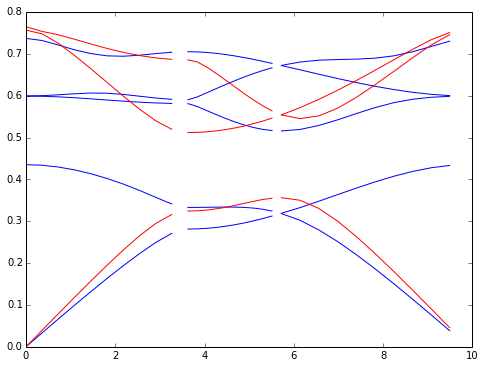

In [26]:
%reload_ext autoreload
%autoreload

%pylab inline

import pickle
import os

from Electromagnetics.Misc import *

file_name = './other/datafiles/photonic_crystals/pc2ddata'

f_name = file_name + '_TM_fin'
f = open(f_name, 'rb')
res_GM = pickle.load(f)
[k_2D_pts_GM, omega_eigs_GM, omega_eigs_vecs_GM] = res_GM
res_MK = pickle.load(f)
[k_2D_pts_MK, omega_eigs_MK, omega_eigs_vecs_MK] = res_MK
res_KG = pickle.load(f)
[k_2D_pts_KG, omega_eigs_KG, omega_eigs_vecs_KG] = res_KG
symm_points = pickle.load(f)
[Gamma, M, K] = symm_points
f.close()

k_GM = np.array([(k_2D_pts_GM[i]-Gamma).norm() for i in range(len(k_2D_pts_GM))])
k_MK = np.array([(k_2D_pts_MK[i]-M).norm()+(M-Gamma).norm() for i in range(len(k_2D_pts_MK))])
k_KG = np.array([(k_2D_pts_KG[i]-K).norm()+(K-M).norm()+(M-Gamma).norm() for i in range(len(k_2D_pts_KG))])

figsize(8, 6)

n_bands = len(omega_eigs_GM)
for i in range(n_bands):
    plot(k_GM, np.sqrt(np.real(omega_eigs_GM[i]))/(2.0*math.pi), 'b')
    plot(k_MK, np.sqrt(np.real(omega_eigs_MK[i]))/(2.0*math.pi), 'b')
    plot(k_KG, np.sqrt(np.real(omega_eigs_KG[i]))/(2.0*math.pi), 'b')

f_name = file_name + '_TE_fin'
f = open(f_name, 'rb')
res_GM = pickle.load(f)
[k_2D_pts_GM, omega_eigs_GM, omega_eigs_vecs_GM] = res_GM
res_MK = pickle.load(f)
[k_2D_pts_MK, omega_eigs_MK, omega_eigs_vecs_MK] = res_MK
res_KG = pickle.load(f)
[k_2D_pts_KG, omega_eigs_KG, omega_eigs_vecs_KG] = res_KG
symm_points = pickle.load(f)
[Gamma, M, K] = symm_points
f.close()

k_GM = np.array([(k_2D_pts_GM[i]-Gamma).norm() for i in range(len(k_2D_pts_GM))])
k_MK = np.array([(k_2D_pts_MK[i]-M).norm()+(M-Gamma).norm() for i in range(len(k_2D_pts_MK))])
k_KG = np.array([(k_2D_pts_KG[i]-K).norm()+(K-M).norm()+(M-Gamma).norm() for i in range(len(k_2D_pts_KG))])


n_bands = len(omega_eigs_GM)
for i in range(n_bands):
    plot(k_GM, np.sqrt(np.real(omega_eigs_GM[i]))/(2.0*math.pi), 'r')
    plot(k_MK, np.sqrt(np.real(omega_eigs_MK[i]))/(2.0*math.pi), 'r')
    plot(k_KG, np.sqrt(np.real(omega_eigs_KG[i]))/(2.0*math.pi), 'r')



In [14]:
res = pctm.solveEigenvalues_RQ_NLCG()

90800.959102
236029.610402
204834.303212
98866.0524652
55475.3727915
42570.7132557
30279.0342147
19927.0995159
26073.5907448
16648.1492969
12738.5404192
11886.7662549
10650.0131252
8269.25971644
7888.23300258
7040.27620877
6148.74976365
5239.40114215
4355.95502378
4491.19112314
3972.41216338
3473.28761739
5257.64577984
3385.4062953
2833.93190672
2612.84194592
2514.75067786
2354.36841419
2247.41978431
2074.34645884
2132.3105398
1954.54264091
2012.99907364
1825.62696709
1769.13130195
1746.20196081
1624.34045383
1651.21697585
1537.66550356
1400.05547118
1325.82770465
1235.72746335
1140.64636136
1050.92299837
985.892694984
1001.12950309
959.58664302
925.203703931
1098.04726259
919.581204175
873.992372771
842.783330162
834.603826737
820.896066054
785.595512138
946.074450634
779.27457702
754.620307834
744.910282438
703.7782118
673.631969523
660.434153934
639.839660241
644.861149468
624.912840738
626.37591207
608.336362725
588.920520549
570.902543232
557.03948873
543.487508049
531.157590602
5

17.5928387214
17.5792138123
17.57207
17.5685128005
17.5687118721
17.5635161571
17.5618362443
17.5566534496
17.5506447258
17.5466592102
17.5453580979
17.5365743195
17.5340849258
17.5170187649
17.5515891481
17.5101062687
17.4783747171
17.4349517255
17.4027740692
17.3738874837
17.3497182538
17.3269122378
17.2935443545
17.3832094967
17.2824944797
17.2283600686
17.1906844926
17.1660017332
17.1569153024
17.1538526263
17.1491979392
17.1474908511
17.1462416445
17.1411197846
17.1388325995
17.136721987
17.1348904712
17.1322607134
17.1323643112
17.1316073835
17.1284747526
17.1241599939
17.1197904845
17.1182728266
17.1116001224
17.1002957351
17.0913481462
17.0644459499
17.0246076058
17.0134155646
17.0195958829
17.0107680545
17.0066048732
17.0094536728
17.0040010664
17.002663138
17.0014960491
16.9993362901
16.9967071976
16.9934781822
16.988895585
16.9969500197
16.9868819442
16.9801926266
16.9708465591
16.9671002383
16.9502255849
16.924613219
16.9163029739
16.8827702741
16.8289593402
16.8121151596
1

15.1761536243


In [15]:
print(res)

[15.176153624319499, array([  3.27676711e-02,   1.94801436e-02,   1.20007190e-02, ...,
        -7.89736664e-05,  -5.62638268e-05,  -9.17409648e-05])]


In [135]:
#eig_vec_0=G_z_F+np.random.random(G_z_F.shape)*1.0e-3
eig_0 = omega_eigs[0][2].real
eig_vec_0 = omega_eigs[1].T[2] + np.random.random(G_z_F.shape)*1.0e-3
eigs_prev = [omega_eigs[0][0].real, omega_eigs[0][1].real]
eigs_vec_prev = [omega_eigs[1].T[0], omega_eigs[1].T[1]]
res = pctm.solveEigenvalues_RQ_NLCG(eig_0=eig_0, eig_vec_0=eig_vec_0, eigs_prev=eigs_prev, eigs_vec_prev=eigs_vec_prev)

53.455927368
44300.1097772
44297.9813208
44290.6402063
44257.1632237
43910.8804936
25325.6408664
25.3341370407
188.145348606
21.6883763324
23.5928702697
20.2257773272
23.4117675528
19.870469204
19.8004340738
19.671638143
19.8538918706
19.6025702747
19.5845583881
19.5625203886
19.5387462586
19.5338793691
19.5387311495
19.5205353693
19.5120970871
19.5161283792
19.5086507651
19.503719125
19.5026831006
19.5029760256
19.4997409505
19.4982076582
19.4977386061
19.4963306341
19.4956735268
19.4954059339
19.4942235786
19.4938686898
19.4935223068
19.4928596639
19.4924180935
19.4921188281
19.4916084448
19.4911568701
19.4911368085
19.490665822
19.4902721808
19.490229161
19.4900619157
19.4898326005
19.489815549
19.4897123522
19.489627987
19.4896827096
19.4895957306
19.4895428219
19.4895115839
19.4894318775
19.4893876751
19.4893763446
19.4893312679
19.4892680464
19.4892355127
19.4892249386
19.4892251975
19.4892032669
19.4891959631
19.4891901457
19.4891682489
19.4891528082
19.4891024606
19.4890637835


In [349]:

#x_vec = pctm.get_randon_vec_for_test()
x_vec = np.random.random(pctm.pc2d.n_total)


y_FFT = pctm.matVecProductFFT(x_vec)
y_DIR = pctm.matVecProductDirect(x_vec)

print(max(abs(x_vec)))
print(max(abs(y_DIR)))
print(max(abs(y_FFT)))
resid = np.linalg.norm(y_FFT - y_DIR)/max(abs(y_DIR))


print('resid: ', resid)

#print(pctm.eps_r_inv_vec[9:20, 9:20])

0.999371185667
425835.431224
525219.179667
resid:  3.03602415374


In [456]:

N = 8
eps_vec = np.random.rand(2*N, 2*N)
#eps_vec = np.ones((2*N, 2*N))
for i in range(2*N):
    for j in range(2*N):
        if i<N/2 or j<N/2 or i>3*N/2-1 or j>3*N/2-1:
            eps_vec[i,j] = 0
            
pctm.pc2d.pars_vecs = [eps_vec]
[A_lin_sp, A_convs, A_eig_sp_list, A_eig_dense_list, b_rhs] = pctm.pc2d.orthogonalToNumpyMatrix()

            
x_vec = random((2*N, 2*N))
#x_vec = np.ones((2*N, 2*N))
for i in range(2*N):
    for j in range(2*N):
        if i<N/2 or j<N/2 or i>3*N/2-1 or j>3*N/2-1:
            x_vec[i,j] = 0
print('x_vec:\n', x_vec)
x_vec_rs = x_vec.T.reshape((pctm.pc2d.n_total,))
print('x_vec.reshape:\n', x_vec_rs)

"""
pc2d.save_n_as_powers = True
pc2d.save_m_as_powers = True
res = pc2d.getConvProductsFFT(x_vec_rs)
print('vars_ND_array:\n', np.real(pc2d.vars_ND_array))
print('res:\n', res)
"""

res = pctm.pc2d.getConvProductsFFT(x_vec_rs)
print('res:\n', res)

#A_convs = pctm.A_mat[1]
Ax = A_convs.dot(x_vec_rs)
#Ax = x_vec_rs.dot(A_convs)
print('A_convs.dot(x_vec):\n', Ax)
print('all close:', np.allclose(res[0], Ax))
print('norm(res[0] - Ax): ', np.linalg.norm(res[0] - Ax)/max(abs(Ax)))


x_vec:
 [[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.000

   0.00000000e+00+0.j]
all close: False
norm(res[0] - Ax):  5.32634810307e-15


In [31]:
from sympy import Symbol, symbols, Matrix, exp, I, latex, simplify

x, y, z = symbols('x y z')
Hx = Symbol('H_{x}')
Hy = Symbol('H_{y}')
Hz = Symbol('H_{z}')
k, k0 = symbols('k k_0')
omega = Symbol('\\omega')
eps_r, mu_r, eta = symbols('\\epsilon_r \\mu_r \\eta')
eps_0, mu_0 = symbols('\\epsilon_0 \\mu_0')
eps_r_inv = Symbol('\\epsilon_r^{-1}')

H = Matrix([[0, 0, Hz]])*exp(-I*k*x)
E = 1/(I*omega*eps_0)*eps_r_inv*curl_r(H)

EQ = omega*(curl_r(E) + I*omega*mu_0*H)

display(Math(latex(EQ)))


v_recip = [[1.0, 0.0], [0.0, 1.0]]
pc2d = PDEFourierSeriesND(EQ, vars_fourier=[Hz, eps_r_inv], n_dim=2, vecRecip=v_recip)



In [3]:
%reload_ext autoreload
%autoreload

from Electromagnetics.VectorCalculus import *
from Electromagnetics.FourierBlochND import *
from IPython.display import display, Math, Latex
from scipy import constants
import math


from sympy import Symbol, symbols, Matrix, exp, I, latex, simplify

x, y, z = symbols('x y z')
Hx = Symbol('H_{x}')
Hy = Symbol('H_{y}')
Hz = Symbol('H_{z}')
k, k0 = symbols('k k_0')
omega = Symbol('\\omega')
eps_r, mu_r, eta = symbols('\\epsilon_r \\mu_r \\eta')
eps_0, mu_0 = symbols('\\epsilon_0 \\mu_0')
eps_r_inv = Symbol('\\epsilon_r^{-1}')

H = Matrix([[0, 0, Hz]])*exp(-I*k*x)
E = 1/(I*omega*eps_0)*eps_r_inv*curl_r(H)

EQ = omega*(curl_r(E) + I*omega*mu_0*H)

display(Math(latex(EQ)))


v_recip = [[1.0, 0.0], [0.0, 1.0]]
pc2d = PDEFourierSeriesND(EQ, vars_fourier=[Hz, eps_r_inv], n_dim=2, vecRecip=v_recip)
EQ_F = pc2d.putSums()
EQ_F = Matrix([[EQ_F[i,j].doit() for j in range(EQ_F.cols)] for i in range(EQ_F.rows)])

display(Math(latex(EQ_F.T)))
display(Math(latex(pc2d.varsHarm)))

EQ_F = [EQ_F[2]]

EQ_F = [pc2d.applyConvolutions(EQ_F[i]) for i in range(len(EQ_F))]
display(Math(latex(Matrix(EQ_F))))


EQ_F = [simplify(pc2d.applyOrthogonalities(EQ_F[i])/exp(-I*k*x)) for i in range(len(EQ_F))]
display(Math(latex(Matrix(EQ_F))))


In [8]:
import numpy as np

Hz_tilde, eps_r_inv_tilde = pc2d.varsHarm
N = 10
eps_r_inv_vec = np.random.rand(2*N, 2*N)
print('eps_r_inv_vec:\n', eps_r_inv_vec)

freq = 10.0*constants.giga
#EQ_F_fin = EQ_F.subs([(omega, 2.0*math.pi*freq), (eps_0, constants.epsilon_0), (mu_0, constants.mu_0), (pc2d.Xs[0], 1.0), (pc2d.Xs[1], 1.0)])
EQ_F_fin = [EQ_F[i].subs([(k, 1.0), (eps_0, 1.0), (mu_0, 1.0)]) for i in range(len(EQ_F))]
display(Math(latex(Matrix(EQ_F_fin))))

pc2d.setupNumericalParameters(EQ_F_fin, Ns=[N, N], vars=[Hz_tilde], pars=[eps_r_inv_tilde], pars_vecs=[eps_r_inv_vec], eig_vars=[omega])


[A_lin_sp, A_convs, A_eig_sp_list, b_rhs] = pc2d.orthogonalToNumpyMatrix()


eps_r_inv_vec:
 [[ 0.50446094  0.69048694  0.5525497   0.42971529  0.50632789  0.64988454
   0.73817883  0.02458961  0.55479276  0.98642081  0.4053112   0.20209736
   0.22545884  0.20110717  0.70939176  0.4002134   0.68551035  0.61646053
   0.52475298  0.82328494]
 [ 0.94055678  0.64158768  0.03809818  0.94518614  0.24693132  0.26865723
   0.01459286  0.24584102  0.20333662  0.40901996  0.01122893  0.77660398
   0.95761509  0.62025775  0.57277269  0.51096843  0.84792144  0.06778868
   0.66162072  0.63329479]
 [ 0.18799186  0.24557068  0.22334385  0.73416809  0.80694868  0.92953638
   0.86028993  0.53035759  0.58537894  0.64591961  0.1083317   0.18416209
   0.69641367  0.95788579  0.59660665  0.35340685  0.93223863  0.70901226
   0.35084878  0.88594968]
 [ 0.57439337  0.10886818  0.09448387  0.36663315  0.00790683  0.81548821
   0.89532658  0.12871272  0.9916538   0.5280835   0.98222974  0.62501556
   0.07575426  0.13625292  0.16679227  0.13802826  0.91899276  0.99432807
   0.17020364  

In [7]:
print('A_lin_sp :\n', A_lin_sp)
print('-'*30)
print('A_eig_sp_list:\n')
for coeff_mat in A_eig_sp_list:
    coeff, mat = coeff_mat
    print('coeff: ', coeff)
    print('mat:', mat)
print('-'*30)
print('A_convs:\n', A_convs)
print('-'*30)
print('b_rhs:\n', b_rhs)
print('-'*30)
print('eps_r_inv_vec:\n', eps_r_inv_vec)

A_lin_sp :
 
------------------------------
A_eig_sp_list:

coeff:  1.0*I*\omega**2
mat:   (0, 0)	(1+0j)
  (1, 1)	(1+0j)
  (2, 2)	(1+0j)
  (3, 3)	(1+0j)
  (4, 4)	(1+0j)
  (5, 5)	(1+0j)
  (6, 6)	(1+0j)
  (7, 7)	(1+0j)
  (8, 8)	(1+0j)
  (9, 9)	(1+0j)
  (10, 10)	(1+0j)
  (11, 11)	(1+0j)
  (12, 12)	(1+0j)
  (13, 13)	(1+0j)
  (14, 14)	(1+0j)
  (15, 15)	(1+0j)
------------------------------
A_convs:
 [[ 0. -1.00493986e+01j  0. -9.14518135e+00j  0. -5.46830238e+00j
   0. +0.00000000e+00j  0. -4.72317125e+00j  0. -4.06492363e+00j
   0. -4.50430955e+00j  0. +0.00000000e+00j  0. -2.45033548e+00j
   0. -8.58496731e-01j  0. -2.43898760e+00j  0. +0.00000000e+00j
   0. +0.00000000e+00j  0. +0.00000000e+00j  0. +0.00000000e+00j
   0. +0.00000000e+00j]
 [ 0. -2.77648284e+00j  0. -6.18424527e+00j  0. -5.48710881e+00j
   0. -3.12474422e+00j  0. -2.16879001e+00j  0. -2.57627523e+00j
   0. -2.03246181e+00j  0. -1.80172382e+00j  0. -2.41004886e+00j
   0. -1.08903799e+00j  0. -2.86165577e-01j  0. -3.3306690

### test convolutiion products

In [423]:
%reload_ext autoreload
%autoreload

from Electromagnetics.VectorCalculus import *
from Electromagnetics.FourierBlochND import *
from IPython.display import display, Math, Latex
from scipy import constants
import math


from sympy import Symbol, symbols, Matrix, exp, I, latex, simplify, Derivative

x, y, z = symbols('x y z')
Ex = Symbol('E_{x}')
Ey = Symbol('E_{y}')
Ez = Symbol('E_{z}')
k, k0 = symbols('k k_0')
omega = Symbol('\\omega')
eps_r, mu_r, eta = symbols('\\epsilon_r \\mu_r \\eta')
eps_0, mu_0 = symbols('\\epsilon_0 \\mu_0')


EQ = k*Ez + 5.0*omega*eps_r*Derivative(Ez, x, 2, y)

display(Math(latex(EQ)))


v_recip = [[1.0, 0.0], [1.0, 1.0]]
pc2d = PDEFourierSeriesND(EQ, vars_fourier=[Ez, eps_r], n_dim=2, vecRecip=v_recip)
EQ_F = pc2d.putSums()
EQ_F = EQ_F.doit()

display(Math(latex(EQ_F)))
display(Math(latex(pc2d.varsHarm)))


EQ_F = pc2d.applyConvolutions(EQ_F)
display(Math(latex(EQ_F)))


EQ_F = simplify(pc2d.applyOrthogonalities(EQ_F))
display(Math(latex(EQ_F)))


harmonic: 


len(node[3]): 17 0:00:00  len(node[3]): 16 0:00:00  len(node[3]): 15 0:00:00  len(node[3]): 14 0:00:00  len(node[3]): 13 0:00:00  len(node[3]): 12 0:00:00  len(node[3]): 11 0:00:01  len(node[3]): 10 0:00:01  len(node[3]): 9 0:00:02  len(node[3]): 8 0:00:02  len(node[3]): 7 0:00:03  len(node[3]): 6 0:00:04  len(node[3]): 5 0:00:05  len(node[3]): 4 0:00:06  len(node[3]): 3 0:00:07  len(node[3]): 2 0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09  0:00:09

In [424]:
import numpy as np

Ez_tilde, eps_r_tilde = pc2d.varsHarm
N = 8
eps_vec = np.random.rand(2*N, 2*N)
#eps_vec = np.ones((2*N, 2*N))
for i in range(2*N):
    for j in range(2*N):
        if i<N/2 or j<N/2 or i>3*N/2-1 or j>3*N/2-1:
            eps_vec[i,j] = 0

print('eps_r:\n', eps_vec)

EQ_F_fin = [EQ_F.subs([(omega, 1.0), (eps_0, 1.0), (mu_0, 1.0), (pc2d.Xs[0], 1.0), (pc2d.Xs[1], 1.0)])]
display(Math(latex(Matrix(EQ_F_fin))))

pc2d.setupNumericalParameters(EQ_F_fin, Ns=[N, N], vars=[Ez_tilde], pars=[eps_r_tilde], pars_vecs=[eps_vec], eig_vars=[k])


pc2d.save_n_as_powers = False
pc2d.save_m_as_powers = False
pc2d.useFFTforConvs = True
pc2d.calculateDenseMatrices = True

[A_lin_sp, A_convs, A_eig_sp_list, A_eig_dense_list, b_rhs] = pc2d.orthogonalToNumpyMatrix()


eps_r:
 [[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.68305904  0.5348984
   0.25951212  0.38407454  0.70119397  0.30701004  0.69189538  0.59807071
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.18178778 

In [425]:
print('A_lin_sp :\n', A_lin_sp)
print('-'*30)
print('A_eig_sp_list:\n')
for coeff_mat in A_eig_sp_list:
    coeff, mat = coeff_mat
    print('coeff: ', coeff)
    print('mat:', mat)
print('-'*30)
print('A_convs:\n', A_convs)
print('-'*30)
print('A_eig_dense_list:\n', A_eig_dense_list)
print('-'*30)
print('b_rhs:\n', b_rhs)
print('-'*30)
print('eps_r:\n', eps_vec)

A_lin_sp :
 
------------------------------
A_eig_sp_list:

coeff:  k
mat:   (0, 0)	(1+0j)
  (1, 1)	(1+0j)
  (2, 2)	(1+0j)
  (3, 3)	(1+0j)
  (4, 4)	(1+0j)
  (5, 5)	(1+0j)
  (6, 6)	(1+0j)
  (7, 7)	(1+0j)
  (8, 8)	(1+0j)
  (9, 9)	(1+0j)
  (10, 10)	(1+0j)
  (11, 11)	(1+0j)
  (12, 12)	(1+0j)
  (13, 13)	(1+0j)
  (14, 14)	(1+0j)
  (15, 15)	(1+0j)
  (16, 16)	(1+0j)
  (17, 17)	(1+0j)
  (18, 18)	(1+0j)
  (19, 19)	(1+0j)
  (20, 20)	(1+0j)
  (21, 21)	(1+0j)
  (22, 22)	(1+0j)
  (23, 23)	(1+0j)
  (24, 24)	(1+0j)
  :	:
  (231, 231)	(1+0j)
  (232, 232)	(1+0j)
  (233, 233)	(1+0j)
  (234, 234)	(1+0j)
  (235, 235)	(1+0j)
  (236, 236)	(1+0j)
  (237, 237)	(1+0j)
  (238, 238)	(1+0j)
  (239, 239)	(1+0j)
  (240, 240)	(1+0j)
  (241, 241)	(1+0j)
  (242, 242)	(1+0j)
  (243, 243)	(1+0j)
  (244, 244)	(1+0j)
  (245, 245)	(1+0j)
  (246, 246)	(1+0j)
  (247, 247)	(1+0j)
  (248, 248)	(1+0j)
  (249, 249)	(1+0j)
  (250, 250)	(1+0j)
  (251, 251)	(1+0j)
  (252, 252)	(1+0j)
  (253, 253)	(1+0j)
  (254, 254)	(1+0j)
  (255, 2

In [426]:
from numpy.random import random
from scipy.signal import convolve2d
from scipy import fftpack
from scipy.fftpack import *

x_vec = random((2*N, 2*N))
#x_vec = np.ones((2*N, 2*N))
for i in range(2*N):
    for j in range(2*N):
        if i<N/2 or j<N/2 or i>3*N/2-1 or j>3*N/2-1:
            x_vec[i,j] = 0
print('x_vec:\n', x_vec)
x_vec_rs = x_vec.T.reshape((pc2d.n_total,))
print('x_vec.reshape:\n', x_vec_rs)

"""
pc2d.save_n_as_powers = True
pc2d.save_m_as_powers = True
res = pc2d.getConvProductsFFT(x_vec_rs)
print('vars_ND_array:\n', np.real(pc2d.vars_ND_array))
print('res:\n', res)
"""

res = pc2d.getConvProductsFFT(x_vec_rs)
print('res:\n', res)

Ax = A_convs.dot(x_vec_rs)
#Ax = x_vec_rs.dot(A_convs)
print('A_convs.dot(x_vec):\n', Ax)
print('all close:', np.allclose(res[0], Ax))
print('norm(res[0] - Ax): ', np.linalg.norm(res[0] - Ax)/max(abs(Ax)))

print('Ax_reshaped:\n', np.real(Ax.reshape((2*N, 2*N))))

x_vec = x_vec

print('convolve2d(x_vec, eps_vec): \n', convolve2d(x_vec, eps_vec))
print('ifftn(fftn: \n', fftpack.ifftshift(ifftn(fftn(x_vec)*fftn(eps_vec))))
print('fftn(ifftn: \n', fftpack.fftshift(fftn(ifftn(x_vec)*ifftn(eps_vec)))*(2*N)**2)

res = pc2d.getFourierCoeffs_( pc2d.getInverseFourierCoeffsNoShift(x_vec)*pc2d.getInverseFourierCoeffsNoShift(eps_vec) )
print('res:\n', res)
res = pc2d.getFourierCoeffs_( pc2d.getInverseFourierCoeffs(x_vec)*pc2d.getInverseFourierCoeffs(eps_vec) )
print('res:\n', res)


x_vec:
 [[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.66649118  0.51818653
   0.71974741  0.17719366  0.88470716  0.05204656  0.42976667  0.86836494
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.09732372

         2.28024210e-12 -2.98042945e-12j,   2.52440274e-13 -1.25055990e-12j]), []]
A_convs.dot(x_vec):
 [ 0. +582.72361747j  0. +220.23302759j  0. +843.81136394j
  0. +999.60257205j  0. +596.7257944j   0. +688.91959771j
  0.+1121.92229144j  0. +640.67798146j  0. +354.44353142j
  0. +313.02612707j  0. +182.19284865j  0. +116.51612586j
  0.  +78.09561946j  0.  +33.26051448j  0.   +6.04379062j  0.   +0.j
  0. +716.48119717j  0. +862.99972196j  0. +698.95001559j
  0. +895.40984471j  0.+1271.12093151j  0.+1120.98258252j
  0.+1112.80690003j  0.+1406.22633004j  0. +492.21383417j
  0. +504.33831811j  0. +354.74849428j  0. +137.53415203j
  0. +101.75853461j  0.  +55.06662496j  0.  +16.66801069j  0.   +0.j
  0. +602.10404451j  0. +962.48493167j  0.+1088.37585545j
  0.+1058.22543295j  0.+1203.55318733j  0.+1172.53002172j
  0. +984.63225971j  0.+1096.90653243j  0. +440.50095697j
  0. +371.58313531j  0. +326.77886548j  0.  +86.24049289j
  0.  +34.77563823j  0.  +23.60215451j  0.   +4.78973253j  0. 

    0.        ]]
ifftn(fftn: 
 [[  4.55252826e-01 +2.54136989e-16j   7.10457058e-01 +1.73472348e-17j
    9.41769660e-01 -3.10465164e-16j   8.96483447e-01 +1.73472348e-17j
    1.55223285e+00 -1.56992475e-16j   1.39916862e+00 -5.35162192e-16j
    1.74395661e+00 -9.74964931e-16j   2.27868275e+00 -5.82867088e-16j
    2.07866008e+00 -7.03430370e-16j   1.25158169e+00 -7.28583860e-16j
    1.36894461e+00 -4.18018020e-16j   1.30596315e+00 -6.07153217e-16j
    5.95077849e-01 -4.17200996e-16j   8.57848545e-01 +1.18828558e-16j
    5.19343632e-01 +1.10971965e-16j  -9.02056208e-17 +2.34187669e-16j]
 [  1.87637797e-01 +3.28730099e-16j   7.31301119e-01 -8.41340886e-17j
    1.11595081e+00 -2.76112976e-17j   1.65788514e+00 +3.01841885e-16j
    1.89055325e+00 +2.50233861e-16j   2.25668786e+00 -6.20163643e-16j
    2.35288402e+00 -1.12077564e-15j   2.32800371e+00 -9.12464548e-16j
    2.74275480e+00 -6.63531730e-16j   2.30620913e+00 -4.64905892e-16j
    1.44407465e+00 -5.34150553e-16j   1.78978712e+00 -6.27

    0.00000000e+00 -3.88870002e-17j  -1.14757244e-16 +1.98508799e-17j]]
res:
 [[  4.55252826e-01 -2.54136989e-16j   7.10457058e-01 -1.73472348e-17j
    9.41769660e-01 +3.10465164e-16j   8.96483447e-01 -1.73472348e-17j
    1.55223285e+00 +1.56992475e-16j   1.39916862e+00 +5.35162192e-16j
    1.74395661e+00 +9.74964931e-16j   2.27868275e+00 +5.82867088e-16j
    2.07866008e+00 +7.03430370e-16j   1.25158169e+00 +7.28583860e-16j
    1.36894461e+00 +4.18018020e-16j   1.30596315e+00 +6.07153217e-16j
    5.95077849e-01 +4.17200996e-16j   8.57848545e-01 -1.18828558e-16j
    5.19343632e-01 -1.10971965e-16j  -9.02056208e-17 -2.34187669e-16j]
 [  1.87637797e-01 -3.28730099e-16j   7.31301119e-01 +8.41340886e-17j
    1.11595081e+00 +2.76112976e-17j   1.65788514e+00 -3.01841885e-16j
    1.89055325e+00 -2.50233861e-16j   2.25668786e+00 +6.20163643e-16j
    2.35288402e+00 +1.12077564e-15j   2.32800371e+00 +9.12464548e-16j
    2.74275480e+00 +6.63531730e-16j   2.30620913e+00 +4.64905892e-16j
    1.44407

### test equation

In [167]:
%reload_ext autoreload
%autoreload

from Electromagnetics.VectorCalculus import *
from Electromagnetics.FourierBlochND import *
from IPython.display import display, Math, Latex
from scipy import constants
import math


from sympy import Symbol, symbols, Matrix, exp, I, latex, simplify

x, y, z = symbols('x y z')
Ex = Symbol('E_{x}')
Ey = Symbol('E_{y}')
Ez = Symbol('E_{z}')
k, k0 = symbols('k k_0')
omega = Symbol('\\omega')
eps_r, mu_r, eta = symbols('\\epsilon_r \\mu_r \\eta')
eps_0, mu_0 = symbols('\\epsilon_0 \\mu_0')

E = Matrix([[0, Ey, Ez]])*exp(-I*k*(x+z))
H = -1/(I*omega*mu_0)*curl_r(E)

EQ = curl_r(H) - I*omega*eps_r*eps_0*E

display(Math(latex(EQ)))


v_recip = [[1.0, 0.0], [1.0, 1.0]]
pc2d = PDEFourierSeriesND(EQ, vars_fourier=[Ey, Ez, eps_r], n_dim=2, vecRecip=v_recip)
EQ_F = pc2d.putSums()
EQ_F = Matrix([[EQ_F[i,j].doit() for j in range(EQ_F.cols)] for i in range(EQ_F.rows)])

display(Math(latex(EQ_F.T)))
display(Math(latex(pc2d.varsHarm)))

EQ_F = [EQ_F[1], EQ_F[2]]


EQ_F = [pc2d.applyConvolutions(EQ_F[i]) for i in range(len(EQ_F))]
display(Math(latex(Matrix(EQ_F))))



EQ_F = [simplify(pc2d.applyOrthogonalities(EQ_F[i])/exp(-I*k*(x+z))) for i in range(len(EQ_F))]
display(Math(latex(Matrix(EQ_F))))


In [164]:
import numpy as np

Ey_tilde, Ez_tilde, eps_r_tilde = pc2d.varsHarm
N = 2
eps_vec = np.random.rand(2*N, 2*N)
print('eps_r:\n', eps_vec)

freq = 10.0*constants.giga
#EQ_F_fin = EQ_F.subs([(omega, 2.0*math.pi*freq), (eps_0, constants.epsilon_0), (mu_0, constants.mu_0), (pc2d.Xs[0], 1.0), (pc2d.Xs[1], 1.0)])
EQ_F_fin = [EQ_F[i].subs([(omega, 1.0), (eps_0, 1.0), (mu_0, 1.0), (pc2d.Xs[0], 1.0), (pc2d.Xs[1], 1.0)]) for i in range(len(EQ_F))]
display(Math(latex(Matrix(EQ_F_fin))))

pc2d.setupNumericalParameters(EQ_F_fin, Ns=[N, N], vars=[Ey_tilde, Ez_tilde], pars=[eps_r_tilde], pars_vecs=[eps_vec], eig_vars=[k])


[A_lin_sp, A_convs, A_eig_sp_list, b_rhs] = pc2d.orthogonalToNumpyMatrix()


eps_r:
 [[ 0.0982158   0.21377525  0.56890741  0.33818829]
 [ 0.79816257  0.07384082  0.85429178  0.6599695 ]
 [ 0.38406847  0.5036661   0.09024111  0.14654793]
 [ 0.3702837   0.73284197  0.50783046  0.82077088]]


In [165]:
print('A_lin_sp :\n', A_lin_sp)
print('-'*30)
print('A_eig_sp_list:\n')
for coeff_mat in A_eig_sp_list:
    coeff, mat = coeff_mat
    print('coeff: ', coeff)
    print('mat:', mat)
print('-'*30)
print('A_convs:\n', A_convs)
print('-'*30)
print('b_rhs:\n', b_rhs)
print('-'*30)
print('eps_r:\n', eps_vec)

A_lin_sp :
   (0, 0)	16j
  (1, 1)	9j
  (2, 2)	4j
  (3, 3)	1j
  (4, 4)	9j
  (5, 5)	4j
  (6, 6)	1j
  (8, 8)	4j
  (9, 9)	1j
  (11, 11)	1j
  (12, 12)	1j
  (14, 14)	1j
  (15, 15)	4j
  (16, 16)	20j
  (17, 17)	13j
  (18, 18)	8j
  (19, 19)	5j
  (20, 20)	10j
  (21, 21)	5j
  (22, 22)	2j
  (23, 23)	1j
  (24, 24)	4j
  (25, 25)	1j
  (27, 27)	1j
  (28, 28)	2j
  (29, 29)	1j
  (30, 30)	2j
  (31, 31)	5j
------------------------------
A_eig_sp_list:

coeff:  2.0*I*k**2
mat:   (0, 0)	(1+0j)
  (1, 1)	(1+0j)
  (2, 2)	(1+0j)
  (3, 3)	(1+0j)
  (4, 4)	(1+0j)
  (5, 5)	(1+0j)
  (6, 6)	(1+0j)
  (7, 7)	(1+0j)
  (8, 8)	(1+0j)
  (9, 9)	(1+0j)
  (10, 10)	(1+0j)
  (11, 11)	(1+0j)
  (12, 12)	(1+0j)
  (13, 13)	(1+0j)
  (14, 14)	(1+0j)
  (15, 15)	(1+0j)
coeff:  -2.0*I*k
mat:   (0, 0)	(-2+0j)
  (1, 1)	(-1+0j)
  (2, 2)	0j
  (3, 3)	(1+0j)
  (4, 4)	(-2+0j)
  (5, 5)	(-1+0j)
  (6, 6)	0j
  (7, 7)	(1+0j)
  (8, 8)	(-2+0j)
  (9, 9)	(-1+0j)
  (10, 10)	0j
  (11, 11)	(1+0j)
  (12, 12)	(-2+0j)
  (13, 13)	(-1+0j)
  (14, 14)	0j
  (15, 